# Analysis Challenge Assignment 4---Siyuan_Gu

## 1.Importing packages and dataset

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

For the sample dataset, I built a csv file that recored the times of randomly group sample from my another class. The number refers to the times that people were divided into same discussion group. It may affect their chance to communicate with each other. I just picked 40 of the whole course members since some of them are unknown.

In [17]:
import os
os.chdir('C:/Users/gusiy/Desktop/HUDK4050EDM/ACA4_dataset')
GOT = pd.read_csv("Group.csv", index_col = 0)
Graph = nx.Graph(GOT)

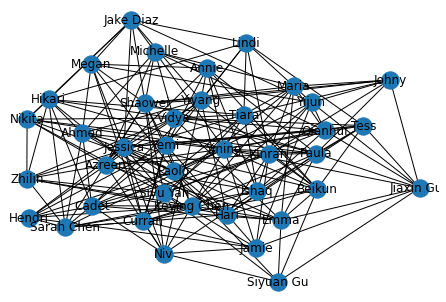

In [18]:
nx.draw(Graph, with_labels = True)

The nodes are each student in our class, and the link refers to the chance that they were divied into same group.

And we can see that students localed at the central of this graph make more connected chance to other members.

## 2.Statistics

### Density 

In [19]:
density = nx.density(Graph)
print('The edge density is: %.3f' % (density))

The edge density is: 0.270


Since it is a same population, people get relatively big chance to connect to each other through the whole semester. I think 0.270 is fair enough for them to build network with each other as there were totally 14 class sessions made.

### Degree Centrality

In [21]:
degree = nx.degree(Graph)
degree
pd.DataFrame(degree)

,0,1
0,Beikun,11
1,Hari,11
2,Ahmed,10
3,Cadet,10
4,Keying Chen,11
5,Sarah Chen,11
6,Ishaq,10
7,Tess,10
8,Jake Diaz,9
9,Paula,12


Here the Degree Centrality describe the recorded group of our dataset. Although the group are randomly assigned, students have differences on connecting to diverse other students.The more the value is, the more people they get to know within the whole class.

In [22]:
close = nx.closeness_centrality(Graph)
pd.DataFrame.from_dict(close, orient = 'index')

,0
Beikun,0.575758
Hari,0.584615
Ahmed,0.567164
Cadet,0.567164
Keying Chen,0.584615
Sarah Chen,0.575758
Ishaq,0.575758
Tess,0.567164
Jake Diaz,0.550725
Paula,0.593750


And for the Closeness centrality, since the time of group assigned for each student are pretty similar, it does not describe meaningful result.

### Community detection

We will try **networkx** function to detect possible network group produced by the randomly assigned groups, which means studnets may form potential small social groups after 14 classes discussions.

In [23]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

c = list(greedy_modularity_communities(Graph))

print(len(c))

2


Seems like there are 2 potential social groups.

In [24]:
Group_1 = sorted(c[0])
Group_2 = sorted(c[1])

print(Group_1)
print(Group_2)

['Ahmed', 'Annie', 'Azreen', 'Beikun', 'Cadet', 'Emma', 'Hari', 'Hikari', 'Jiaxin Guo', 'Michelle', 'Nikita', 'Paolo', 'Paula', 'Sarah Chen', 'Siyuan Gu', 'Tess', 'Vidya', 'Yining', 'Yiyang', 'Zhilin']
['Curran', 'Hendri', 'Ishaq', 'Jake Diaz', 'Jamie', 'Jessica', 'Johny', 'Keying Chen', 'Lindi', 'Maria', 'Megan', 'Niv', 'Qianhui', 'Shaowei', 'Siyu Yan', 'Tiara', 'Xinran', 'Yemi', 'Yijun']


Let's visualize it.

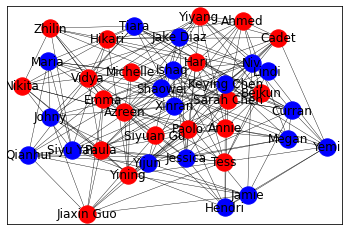

In [25]:
pos = nx.spring_layout(Graph)

nx.draw_networkx_nodes(Graph, pos = pos, nodelist=Group_1, node_color='red', label = True)
nx.draw_networkx_nodes(Graph, pos = pos, nodelist=Group_2, node_color='blue', label = True)

nx.draw_networkx_edges(Graph, pos = pos, width = 0.4)

nx.draw_networkx_labels(Graph, pos=pos)

plt.show()

The reason why the groups are distributed discretely is that students may assigned into same group more than 1 time. It means that they have more possiblity to get along with each other with more time doing discussion.

## 3.Optimization of Visualization

To adjust the zoom ratio of nodes and vertices, we do actions below.

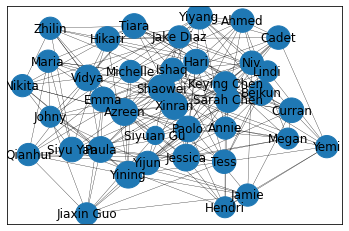

In [39]:
nx.draw_networkx_nodes(Graph, pos = pos, nodelist = dict(degree).keys(), node_size = [v * 55 for v in dict(degree).values()], label = True)
nx.draw_networkx_edges(Graph, pos = pos, width = 0.3)
nx.draw_networkx_labels(Graph, pos = pos)
plt.show()

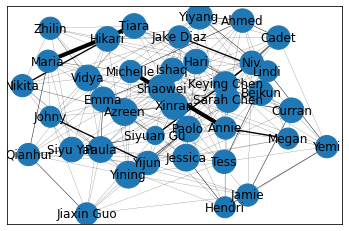

In [49]:
eWeight = nx.get_edge_attributes(Graph,'weight')

nx.draw_networkx_nodes(Graph, pos = pos, nodelist = dict(degree).keys(), node_size = [v * 55 for v in dict(degree).values()], label = True)
nx.draw_networkx_edges(Graph ,pos, width = [3**e/20 for e in eWeight.values()])
nx.draw_networkx_labels(Graph, pos = pos)

plt.show()

Then coloring the graph so that we could see more properties of different communities.

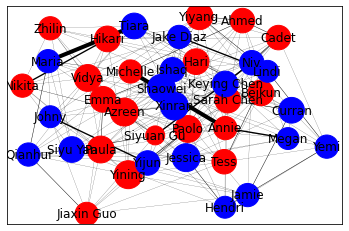

In [52]:
Group_1_degree = {c: dict(degree)[c] for c in Group_1}
Group_2_degree = {c: dict(degree)[c] for c in Group_2}

nx.draw_networkx_nodes(Graph, pos = pos, 
                       nodelist=Group_1,
                       node_color='red',
                       node_size = [v * 60 for v in Group_1_degree.values()],
                       label = True)

nx.draw_networkx_nodes(Graph, pos = pos, 
                       nodelist=Group_2,
                       node_color='blue',
                       node_size = [v * 60 for v in Group_2_degree.values()],
                       label = True)

nx.draw_networkx_edges(Graph,pos, width = [3**e/20 for e in eWeight.values()])

nx.draw_networkx_labels(Graph, pos=pos)

plt.show()

## 4.Conclusion

For potential group(community)--1, Annie and Michelle, Tiara and Maria make a strong possible connection with each other(the two most thick lines). Emma, Azreenand Sarah are the core roles of group--1(**red**); Shaowei, Xinran, Ishaq are the core roles of the network from group--2(**blue**). If I want to know more students in our class, I should probably get connected with them to know others. And if I would like to network through different groups(i.e. blue to red), I may prefer meeting Annie or Megan and they have had strong connection. 